In [1]:
import pandas as pd
import matplotlib
import sys
sys.path.append("..") # so we can import our custom utils module
import utils
import mkr_tools
from functools import reduce
%matplotlib inline

In [2]:
df = pd.read_excel('../data/debt_lives_processed.xlsx')

In [3]:
sequences = utils.dataframe_to_sequences(df)
sequences[:5] # see first 5 CDPs represented as state sequences

[[('safe', 1549495867.0, 0.0)],
 [('safe', 1549495085.0, 782.0)],
 [('safe', 1549493938.0, 1929.0)],
 [('safe', 1549492995.0, 2772.0), ('wiped', 1549495767.0, 100.0)],
 [('safe', 1549492791.0, 3076.0)]]

In [4]:
print("{} sequences".format(len(sequences)))

26260 sequences


In [5]:
num_states = pd.Series(map(len, sequences))
last_state = pd.Series(map(lambda x: x[-1][0], sequences))
age = pd.Series(map(lambda x: x[-1][1] - x[0][1] if len(x) > 1 else utils.LAST_TIMESTAMP - x[0][1], sequences))

In [6]:
cdps = pd.concat([num_states, last_state, age], axis=1)
cdps.columns = ['num_states', 'last_state', 'age']
cdps

,num_states,last_state,age
0,1,safe,0.0
1,1,safe,782.0
2,1,safe,1929.0
3,2,wiped,2772.0
4,1,safe,3076.0
5,1,safe,3088.0
6,1,safe,3335.0
7,1,safe,4567.0
8,1,safe,8345.0
9,1,safe,8793.0


In [7]:
df.head()

,cup,start_val,safe,state,debt,born,unsafe,wiped,bitten,shut,...,transition3,transition3_time,transition4,transition4_time,transition5,transition5_time,transition6,transition6_time,transition7,transition7_time
0,14238,61.0,True,open,61.0,1549495867,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1884,50.0,True,open,50.0,1549495085,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4306,300.0,True,open,300.0,1549493938,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14361,15000.0,True,wiped,14990.0,1549492995,NaN,1.549496e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4306,333.0,True,open,333.0,1549492791,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


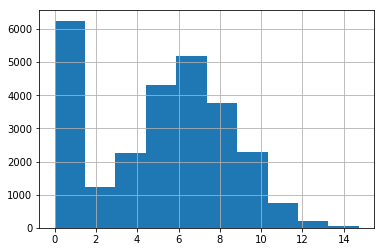

In [8]:
df.debt.map(lambda x: pd.np.log(x+1)).hist();

In [9]:
cdps_raw = mkr_tools.fetch_all_cdps()
cdps = pd.DataFrame(cdps_raw).set_index('id', drop=True).sort_index()

/Users/asvanevik/.local/share/virtualenvs/dai-transitions-Zkp5Dqfu/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


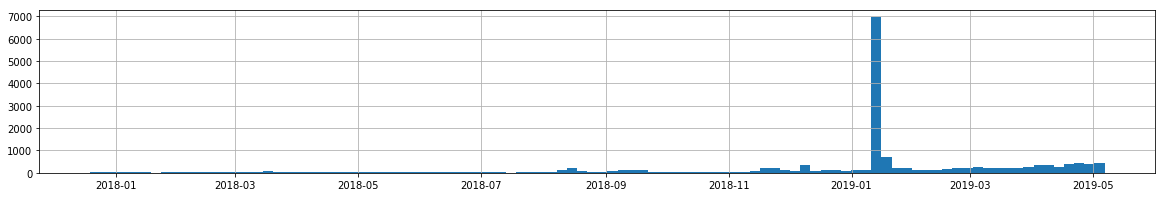

In [10]:
cdps['ts'] = cdps.timestamp.map(lambda x: pd.Timestamp.fromtimestamp(x / 1000))
cdps['ts'].hist(figsize=(20,3), bins=100);

In [23]:
spam_timestamps = list(cdps['ts'].value_counts()[cdps['ts'].value_counts() > 5].index)

In [12]:
cdps[cdps['ts'] == '2019-01-11 19:08:15']

,act,art,block,deleted,eth,ink,ire,lad,liq_price,pep,per,pip,ratio,tab,time,timestamp,ts
id,,,,,,,,,,,,,,,,,
7443,open,0.0,7047681,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T11:08:15.000Z,1547204895000,2019-01-11 19:08:15
7444,open,0.0,7047681,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T11:08:15.000Z,1547204895000,2019-01-11 19:08:15
7445,open,0.0,7047681,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T11:08:15.000Z,1547204895000,2019-01-11 19:08:15
7446,open,0.0,7047681,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T11:08:15.000Z,1547204895000,2019-01-11 19:08:15
7447,open,0.0,7047681,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T11:08:15.000Z,1547204895000,2019-01-11 19:08:15
7448,open,0.0,7047681,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T11:08:15.000Z,1547204895000,2019-01-11 19:08:15
7449,open,0.0,7047681,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T11:08:15.000Z,1547204895000,2019-01-11 19:08:15
7450,open,0.0,7047681,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T11:08:15.000Z,1547204895000,2019-01-11 19:08:15
7451,open,0.0,7047681,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T11:08:15.000Z,1547204895000,2019-01-11 19:08:15


In [13]:
cdps.lad.value_counts()[cdps.lad.value_counts() > 5]

0x2bEFE9dB7431FC454F730cDae94287b1002d758A    4890
0x0000000000000000000000000000000000000000    3128
0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf    1612
0x3A306a399085F3460BbcB5b77015Ab33806A10d5     246
0x1A07Fd4786d38288D60D10E7181C596A4f5d8f38     238
0x046Ce6b8eCb159645d3A605051EE37BA93B6efCc     123
0xaba57DAB95eCdb24fe93ce1DeE1149F196A53c76      63
0x91e8ab0B809435Dd69372EbBe8f176Ab74Bb8Ddc      49
0x641b470Ab5Fe8BD2De95c2Ec9EF6c6CEf1f75b0F      43
0xF02158a00E9fdEa27503402ceD89F871Be60fC4a      19
0xBDc761078D698b1eD53B646d3f68cDadfBD19F60      19
0x5192bc4733e221D95E0E9e86AF9434035eeacc2d      12
0x12266229e3efb7c46ff2ADD936aeBa4135170699      10
0x6c180dA0Ea918bAC24CEb7B0301A5fA1b0878108      10
0x187A5cD08FA9299E41B9A4cCC8F6EE6981E2d2c3       9
0x41524E95021189Bcf3B56cad8d4C2ec7A11BdD6c       8
0x1958fAB172ae554bFac1D60C1C1E64Faa1849994       7
0xFa79C94Db10c11CaE0bFf2e2f17E2b90FBCb870d       7
0x76883678B7e4bDBCE1Afd09AA8F8A2840429daCc       7
0xD8689326B25e28C2133DDC7c97226

In [38]:
cdps

,act,art,block,deleted,eth,ink,ire,lad,liq_price,pep,per,pip,ratio,tab,time,timestamp,ts
id,,,,,,,,,,,,,,,,,
0,lock,0.000000,7268869,False,0.656696,0.630764,0.000000,0x0000000000000000000000000000000000000000,0.000000,515.679,1.0411121794901723,160.8,0.000000,105.596697,2019-02-26T05:02:21.000Z,1551157341000,2019-02-26 13:02:21
1,free,0.000000,6280658,False,0.000000,0.000000,0.000000,0xCd5f8fa45E0cA0937F86006B9eE8fE1eEdEe5FC4,0.000000,515.679,1.0411121794901723,160.8,0.000000,0.000000,2018-09-06T06:08:22.000Z,1536214102000,2018-09-06 14:08:22
2,free,0.000000,6449642,False,0.000000,0.000000,0.000000,0x000dCF36D188714Ec52fE527D437c486D4Fb24D8,0.000000,515.679,1.0411121794901723,160.8,0.000000,0.000000,2018-10-04T04:08:17.000Z,1538626097000,2018-10-04 12:08:17
3,free,0.000000,5354585,False,1.041747,1.000610,0.000000,0xAfa43f2B1a86f74e813ce1af161b50Db3E2236Fc,0.000000,515.679,1.0411121794901723,160.8,0.000000,167.512939,2018-03-31T11:34:11.000Z,1522496051000,2018-03-31 19:34:11
4,free,0.000000,7646571,False,0.000000,0.000000,0.000000,0x6F2A8Ee9452ba7d336b3fba03caC27f7818AeAD6,0.000000,515.679,1.0411121794901723,160.8,0.000000,0.000000,2019-04-27T01:32:26.000Z,1556328746000,2019-04-27 09:32:26
5,free,34370.226350,7648988,False,435.245120,418.057850,33988.055094,0x371fBa9FDB0de9966b6F86d626e03aE7aeA088D1,118.451275,515.679,1.0411121794901723,160.8,203.628031,69987.415270,2019-04-27T10:38:14.000Z,1556361494000,2019-04-27 18:38:14
6,free,0.000000,6738333,False,0.000000,0.000000,0.000000,0x1A40CA0774518D8F7f41df7dA070a4AaE08184F1,0.000000,515.679,1.0411121794901723,160.8,0.000000,0.000000,2018-11-20T07:40:38.000Z,1542699638000,2018-11-20 15:40:38
7,bite,0.000000,5036627,False,50.801377,48.795296,0.000000,0x7C5F6fFaD368dBf1a83E6D66b5aCE792fac2E7C0,0.000000,515.679,1.0411121794901723,160.8,0.000000,8168.861444,2018-02-05T18:22:38.000Z,1517854958000,2018-02-06 02:22:38
8,shut,0.000000,4761524,True,0.000000,0.000000,0.000000,0x0000000000000000000000000000000000000000,0.000000,515.679,1.0411121794901723,160.8,0.000000,0.000000,2017-12-19T19:17:20.000Z,1513711040000,2017-12-20 03:17:20


In [35]:
spam_addresses = ['0x2befe9db7431fc454f730cdae94287b1002d758a',
                  '0x85d035564b0fd2dbf5c11ed4b293905ec900eadf',
                  '0x1a07fd4786d38288d60d10e7181c596a4f5d8f38',
                  '0x91e8ab0b809435dd69372ebbe8f176ab74bb8ddc',
                  '0x641b470ab5fe8bd2de95c2ec9ef6c6cef1f75b0f',
                  '0xaba57dab95ecdb24fe93ce1dee1149f196a53c76' # not a contract, but has suspicious timestamps
                 ]

In [36]:
nonspam_cdps = cdps[cdps.lad.map(lambda x: x.lower() not in spam_addresses)]

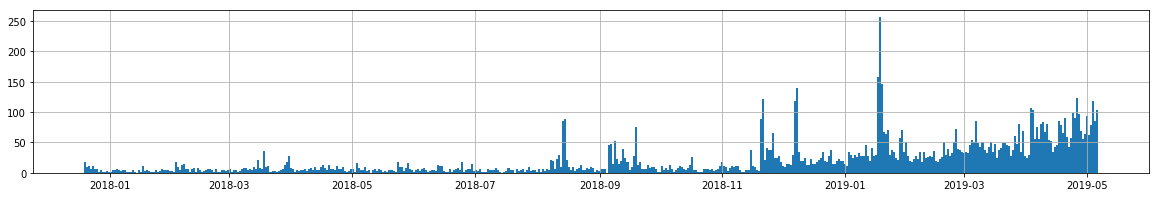

In [44]:
days = (nonspam_cdps['ts'].max() - nonspam_cdps['ts'].min()).days
nonspam_cdps['ts'].hist(figsize=(20,3), bins=days);

In [31]:
cdps[cdps.ts.map(lambda x: x in spam_timestamps)].lad.value_counts()[:10]

0x2bEFE9dB7431FC454F730cDae94287b1002d758A    4884
0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf    1610
0x1A07Fd4786d38288D60D10E7181C596A4f5d8f38     238
0x91e8ab0B809435Dd69372EbBe8f176Ab74Bb8Ddc      49
0xaba57DAB95eCdb24fe93ce1DeE1149F196A53c76       6
0x3A306a399085F3460BbcB5b77015Ab33806A10d5       3
0x5a11f36A42e8a3313FEf951bf8a52772624d14e6       1
0x795ebc1191c004A72b6D14581E6aE801ec7edA08       1
0xf0b8a569C47aFab8526184421FdB1b795304301a       1
0xF558f49EC1e962Da69821BD3a7ec9F21AF90fb98       1
Name: lad, dtype: int64

In [45]:
cdps[cdps.lad == '0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf']

,act,art,block,deleted,eth,ink,ire,lad,liq_price,pep,per,pip,ratio,tab,time,timestamp,ts
id,,,,,,,,,,,,,,,,,
6625,open,0.0,7047555,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T10:37:54.000Z,1547203074000,2019-01-11 18:37:54
6626,open,0.0,7047555,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T10:37:54.000Z,1547203074000,2019-01-11 18:37:54
6660,open,0.0,7047600,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T10:48:29.000Z,1547203709000,2019-01-11 18:48:29
6661,open,0.0,7047600,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T10:48:29.000Z,1547203709000,2019-01-11 18:48:29
6662,open,0.0,7047600,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T10:48:29.000Z,1547203709000,2019-01-11 18:48:29
6663,open,0.0,7047600,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T10:48:29.000Z,1547203709000,2019-01-11 18:48:29
6664,open,0.0,7047600,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T10:48:29.000Z,1547203709000,2019-01-11 18:48:29
6665,open,0.0,7047600,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T10:48:29.000Z,1547203709000,2019-01-11 18:48:29
6666,open,0.0,7047600,False,0.0,0.0,0.0,0x85d035564B0Fd2dbF5c11eD4b293905ec900eAdf,0.0,515.679,1.0411121794901723,160.8,0.0,0.0,2019-01-11T10:48:29.000Z,1547203709000,2019-01-11 18:48:29


In [56]:
cdps[cdps.lad=='0x3a306a399085f3460bbcb5b77015ab33806a10d5'].act.value_counts()

draw    108
free    101
lock     23
bite      7
wipe      6
give      1
Name: act, dtype: int64